# Social Network Analysis on BTS Fandom in Python

In [1]:
import tweepy
import json
import pandas as pd
from pandas.io.json import json_normalize
import time
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import os, sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 
from ipynb.fs.full.Credentials import *

## Data Collection

In [2]:
consumer_key = Twitter_API_KEY 
consumer_secret = Twitter_API_SECRET 
access_token = Twitter_ACCESS_TOKEN 
access_token_secret = Twitter_ACCESS_SECRET 
  
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret) 

api = tweepy.API(auth, wait_on_rate_limit = True) 

In [3]:
def jsonify_tweepy(tweepy_object):
    json_str = json.dumps(tweepy_object._json)
    return json.loads(json_str)

In [4]:
def getFollowers_toDF (followers, item_no_t2):

    followers_all = []
    
    for follower in followers:
    
        try:
            users = api.get_user(screen_name = follower)
            follower_ID = users.id_str
            print("The ID of the user " + follower + " is : " + follower_ID)

            followers_obj = tweepy.Cursor(api.followers, screen_name = follower, count = 200).items(item_no_t2)

            time.sleep(60)

            #Call the function and unload each _json into follower_list
            followers_list = [jsonify_tweepy(follower_obj) for follower_obj in followers_obj]

            #Convert followers_list to a pandas dataframe
            followers_df = json_normalize(followers_list)

            if len(followers_df) > 0:

                followers_df_filtered = followers_df[['screen_name']][followers_df['id_str'].notnull() & 
                                                                      (followers_df['friends_count'] <= 50) & 
                                                                      (1 <= followers_df['friends_count']) & 
                                                                      (followers_df['followers_count'] >= 100)]
                followers_df_filtered['Users'] = follower
                followers_df_filtered.rename(columns={'screen_name':'Followers'}, inplace=True)        

                followers_all.append(followers_df_filtered)
        
        except tweepy.error.TweepError:
            continue

    followers_all = pd.concat(followers_all, axis = 0, ignore_index = True, sort = False)

    return followers_all

In [11]:
def getFriends_toDF (followers, item_no_t2):

    friends_all = []
    
    for follower in followers:
    
        try:
            user = api.get_user(screen_name = follower)
            user_ID = user.id_str
            print("The ID of the user " + follower + " is : " + user_ID)

            friends_obj = tweepy.Cursor(api.friends, screen_name = follower, count = 200).items(item_no_t2)

            time.sleep(60)

            #Call the function and unload each _json into follower_list
            friends_list = [jsonify_tweepy(friend_obj) for friend_obj in friends_obj]

            #Convert followers_list to a pandas dataframe
            friends_df = json_normalize(friends_list)

            if len(friends_df) > 0:

                friends_df_filtered = friends_df[['screen_name']][friends_df['id_str'].notnull() & 
                                                                  (friends_df['friends_count'] >= 1) &
                                                                  (friends_df['friends_count'] <= 150) &
                                                                  (friends_df['followers_count'] >= 100)]
                friends_df_filtered['Followers'] = follower
                friends_df_filtered.rename(columns={'screen_name':'Users'}, inplace=True)        

                friends_all.append(friends_df_filtered)
        
        except tweepy.error.TweepError:
            continue

    friends_all = pd.concat(friends_all, axis = 0, ignore_index = True, sort = False)
    friends_all = friends_all[['Followers', 'Users']]

    return friends_all

In [6]:
def getFriends_T0_toDF (followers):

    friends_all = []
    
    for follower in followers:
    
        try:
            user = api.get_user(screen_name = follower)
            user_ID = user.id_str
            print("The ID of the user " + follower + " is : " + user_ID)

            friends_obj = tweepy.Cursor(api.friends, screen_name = follower, count = 200).items()

            time.sleep(60)

            #Call the function and unload each _json into follower_list
            friends_list = [jsonify_tweepy(friend_obj) for friend_obj in friends_obj]

            #Convert followers_list to a pandas dataframe
            friends_df = json_normalize(friends_list)

            if len(friends_df) > 0:

                friends_df_filtered = friends_df[['screen_name']][friends_df['id_str'].notnull() & 
                                                                  (friends_df['friends_count'] >= 1)]
                friends_df_filtered['Followers'] = follower
                friends_df_filtered.rename(columns={'screen_name':'Users'}, inplace=True)        

                friends_all.append(friends_df_filtered)
        
        except tweepy.error.TweepError:
            continue

    friends_all = pd.concat(friends_all, axis = 0, ignore_index = True, sort = False)
    friends_all = friends_all[['Followers', 'Users']]

    return friends_all

In [7]:
screen_name = 'BTS_twt'

In [16]:
T0_Fr1 = getFriends_T0_toDF([screen_name])

The ID of the user BTS_twt is : 335141638


In [17]:
T0_Fr1

,Followers,Users
0,BTS_twt,jasonderulo
1,BTS_twt,MCHammer
2,BTS_twt,jonasbrothers
3,BTS_twt,vmas
4,BTS_twt,TinyTANofficial
...,...,...
132,BTS_twt,gaekogeem
133,BTS_twt,hitmanb
134,BTS_twt,BIGHITAudition
135,BTS_twt,thehyun11


In [8]:
T1 = getFollowers_toDF([screen_name], 10000)

The ID of the user BTS_twt is : 335141638


Rate limit reached. Sleeping for: 887
Rate limit reached. Sleeping for: 886
Rate limit reached. Sleeping for: 885


In [9]:
T1

,Followers,Users
0,yayduosaeb,BTS_twt
1,YumeHechavarria,BTS_twt
2,Aus4Taehyung,BTS_twt
3,casinobts,BTS_twt
4,jamuellaa,BTS_twt
5,cesvicto,BTS_twt
6,yumxs88,BTS_twt
7,kimtaelys,BTS_twt
8,vantesighs,BTS_twt
9,EB0YKM,BTS_twt


In [12]:
T1_Fr1 = getFriends_toDF(list(T1['Followers']), 50)

The ID of the user yayduosaeb is : 1324930051071119361
The ID of the user YumeHechavarria is : 751322148
The ID of the user Aus4Taehyung is : 1361606195220389890
The ID of the user casinobts is : 1340527152605835264
The ID of the user jamuellaa is : 1230106823136432129
The ID of the user cesvicto is : 1221358718601687040
The ID of the user yumxs88 is : 1361787976615821312
The ID of the user kimtaelys is : 1340684730010906625
The ID of the user vantesighs is : 1192761889299804160
The ID of the user EB0YKM is : 1361767299292741638
The ID of the user yoonkook303 is : 1043957431041232897
The ID of the user bloxPOI is : 1135230558290755584
The ID of the user jisooscloudy is : 1149032215533228033
The ID of the user hhs_journalism is : 245519979
The ID of the user iJUNGK97 is : 1304848607691014144
The ID of the user engsubtitles is : 1272125513104945153
The ID of the user shqrix is : 1060764190447529985
The ID of the user kgelspremium is : 1332485994835181568
The ID of the user jive_k is : 55

In [13]:
T1_Fr1

,Followers,Users
0,yayduosaeb,VEEN_OFFICIAL1
1,yayduosaeb,23jpeg
2,yayduosaeb,Tanxlive
3,yayduosaeb,Stray_Kids
4,yayduosaeb,ENHYPEN
...,...,...
276,Y00NCEN4,TXT_members
277,Y00NCEN4,BTS_twt
278,ubitch____,BigHitEnt
279,ubitch____,bts_bighit


In [14]:
len(list(T1_Fr1['Users'].unique()))

198

In [ ]:
T1_Fr2 = getFriends_toDF(list(T1_Fr1['Users'].unique()), 50)

In [ ]:
T1_Fr2

In [ ]:
list(T1_Fr1['Users'].unique())

In [18]:
T2 = getFollowers_toDF(list(T1['Followers']), 1000)

The ID of the user yayduosaeb is : 1324930051071119361
The ID of the user YumeHechavarria is : 751322148
The ID of the user Aus4Taehyung is : 1361606195220389890
The ID of the user casinobts is : 1340527152605835264
The ID of the user jamuellaa is : 1230106823136432129


Rate limit reached. Sleeping for: 640


The ID of the user cesvicto is : 1221358718601687040
The ID of the user yumxs88 is : 1361787976615821312
The ID of the user kimtaelys is : 1340684730010906625
The ID of the user vantesighs is : 1192761889299804160
The ID of the user EB0YKM is : 1361767299292741638


Rate limit reached. Sleeping for: 580


The ID of the user bloxPOI is : 1135230558290755584
The ID of the user jisooscloudy is : 1149032215533228033
The ID of the user hhs_journalism is : 245519979
The ID of the user iJUNGK97 is : 1304848607691014144
The ID of the user engsubtitles is : 1272125513104945153


Rate limit reached. Sleeping for: 581


The ID of the user shqrix is : 1060764190447529985
The ID of the user kgelspremium is : 1332485994835181568
The ID of the user jive_k is : 555957659
The ID of the user kath_mart10 is : 3241763005
The ID of the user MOCHlHOSHl is : 759895483892527105
The ID of the user loonmadeleine is : 1339060453494849536
The ID of the user jikooklatam2 is : 1361625560284291074
The ID of the user kongplay_ is : 569026887


Rate limit reached. Sleeping for: 401


The ID of the user spoiled_fish is : 1354868378876473349
The ID of the user 8Ybs2SoRPsrnWAB is : 1149986935995166726
The ID of the user TAEHYPlCS is : 1336787086024773637
The ID of the user annyeongclsf is : 1256940204092342273
The ID of the user yjgallery_ is : 1348431997153243138
The ID of the user Y00NCEN4 is : 1352592535827308545
The ID of the user ubitch____ is : 1286670626489430016


Rate limit reached. Sleeping for: 457


In [19]:
T2

,Followers,Users
0,Thatgirlash___,YumeHechavarria
1,MYPurple_V95,Aus4Taehyung
2,taehgersph2,Aus4Taehyung
3,Taehyung_IND_FB,Aus4Taehyung
4,pichularmys,casinobts
5,tkIvsquad,casinobts
6,kvpksquad,casinobts
7,vkooksquad,casinobts
8,casinojustdance,casinobts
9,tkkasquad,casinobts


In [20]:
T2_Fr1 = getFriends_toDF(list(T2['Followers'].unique()), 50)

The ID of the user Thatgirlash___ is : 2408068765
The ID of the user MYPurple_V95 is : 1274675839649505281
The ID of the user taehgersph2 is : 1352054687919345664
The ID of the user Taehyung_IND_FB is : 1351903851658371077
The ID of the user pichularmys is : 1300285872722632710
The ID of the user tkIvsquad is : 1337934038892503045
The ID of the user kvpksquad is : 1303014842580840448
The ID of the user vkooksquad is : 1356999859950260233
The ID of the user casinojustdance is : 1343617228760088577
The ID of the user tkkasquad is : 1289006243726622721
The ID of the user casinohopeworld is : 1340530036454113280
The ID of the user casino_ego is : 1340537593134538758
The ID of the user casino_mama is : 1340534646833070081
The ID of the user CESARalexxx_ is : 1304607417100111873
The ID of the user vintns is : 1356622466391572480
The ID of the user Jookteehee is : 1336445902412607490
The ID of the user EMOBOYKIM is : 1346509361661812749
The ID of the user hourlydolljkk is : 135490849903403417

In [21]:
T2_Fr1

,Followers,Users
0,Thatgirlash___,auranda23
1,Thatgirlash___,YumeHechavarria
2,Thatgirlash___,Lutffi97
3,Thatgirlash___,shelbyaan
4,MYPurple_V95,BTSV_Nigeria
...,...,...
460,yeonsdetail,gyupouty
461,yeonsdetail,thinkmingi
462,yeonsdetail,Iittlejjuni
463,yeonsdetail,thinkyeonjun


In [ ]:
T2_Fr2 = getFriends_toDF(list(T2_Fr1['Users'].unique()), 50)

In [ ]:
T2_Fr2

In [22]:
DF = pd.concat([T0_Fr1, T1, T1_Fr1, T2, T2_Fr1]).drop_duplicates().reset_index(drop=True)

In [23]:
DF

,Followers,Users
0,BTS_twt,jasonderulo
1,BTS_twt,MCHammer
2,BTS_twt,jonasbrothers
3,BTS_twt,vmas
4,BTS_twt,TinyTANofficial
...,...,...
885,yeonsdetail,gyupouty
886,yeonsdetail,thinkmingi
887,yeonsdetail,Iittlejjuni
888,yeonsdetail,thinkyeonjun


## Exploratory Data Analysis

In [24]:
print(DF['Followers'].value_counts())

BTS_twt            137
BADASSVYk           41
taehyunIoops        40
yeonsdetail         32
hhs_journalism      26
                  ... 
taehgersph2          1
tkkasquad            1
kimtaelys            1
Taehyung_IND_FB      1
jamuellaa            1
Name: Followers, Length: 69, dtype: int64


In [ ]:
print(dict(DF['Followers'].value_counts()))

In [25]:
print(DF['Users'].value_counts())

BTS_twt           38
bts_bighit        12
TXT_members       12
bloxPOI            9
BigHitEnt          9
                  ..
hitmanb            1
ParisHilton        1
PrussiaMallBB      1
Camila_Cabello     1
Lippani            1
Name: Users, Length: 645, dtype: int64


In [ ]:
print(dict(DF['Users'].value_counts()))

## Data Visualization

In [46]:
graph = nx.from_pandas_edgelist(DF, 'Followers', 'Users', 
                            edge_attr = None, create_using = nx.DiGraph())

In [47]:
print(nx.info(graph))

Name: 
Type: DiGraph
Number of nodes: 671
Number of edges: 890
Average in degree:   1.3264
Average out degree:   1.3264


In [48]:
'{:.15f}'.format(nx.average_clustering(graph))

'0.066066471670812'

In [149]:
dict(sorted(nx.in_degree_centrality(graph).items(), key=lambda item: item[1], reverse=True))

{'BTS_twt': 0.056716417910447764,
 'TXT_members': 0.01791044776119403,
 'bts_bighit': 0.01791044776119403,
 'BigHitEnt': 0.013432835820895522,
 'casinobts': 0.013432835820895522,
 'bloxPOI': 0.013432835820895522,
 'TXT_bighit': 0.011940298507462687,
 'marktuan': 0.008955223880597015,
 'BUSAPresident': 0.008955223880597015,
 'yjgallery_': 0.007462686567164179,
 'Stray_Kids': 0.007462686567164179,
 'TinyTANofficial': 0.005970149253731343,
 'casinohopeworld': 0.005970149253731343,
 'casinojustdance': 0.005970149253731343,
 'casino_ego': 0.005970149253731343,
 'casino_mama': 0.005970149253731343,
 'SMTOWNGLOBAL': 0.005970149253731343,
 'weareoneEXO': 0.005970149253731343,
 'BamBam1A': 0.005970149253731343,
 'JYPETWICE': 0.005970149253731343,
 'EIIR_Brf': 0.005970149253731343,
 'weverseshop': 0.004477611940298508,
 'bts_love_myself': 0.004477611940298508,
 'Aus4Taehyung': 0.004477611940298508,
 'yumxs88': 0.004477611940298508,
 'ENHYPEN': 0.004477611940298508,
 'JacksonWang852': 0.004477611

In [59]:
dict(sorted(nx.eigenvector_centrality(graph).items(), key=lambda item: item[1], reverse=True))

{'casinobts': 0.42951207619860354,
 'casinohopeworld': 0.33462379275674203,
 'casinojustdance': 0.33462379275674203,
 'casino_ego': 0.33462379275674203,
 'casino_mama': 0.33462379275674203,
 'tkstsquad': 0.17838774534749183,
 'tkflops': 0.17838774534749183,
 'BTS_twt': 0.14709871711307448,
 'tkkusquad': 0.1236777179188874,
 'TKKDSS': 0.10026972164286675,
 'pichularmys': 0.10026972164286675,
 'tkIvsquad': 0.10026972164286675,
 'amisquadofc': 0.10026972164286675,
 'kvpksquad': 0.10026972164286675,
 'vkooksquad': 0.10026972164286675,
 '_kthsquad': 0.10026972164286675,
 'tkknationsquad': 0.10026972164286675,
 'tkgelsquad': 0.10026972164286675,
 'tkkasquad': 0.10026972164286675,
 'TXT_members': 0.034372431686739854,
 'BigHitEnt': 0.03435160178049827,
 'bts_bighit': 0.034342003167277944,
 'TinyTANofficial': 0.03434200312749754,
 'jasonderulo': 0.03434200312657242,
 'MCHammer': 0.03434200312657242,
 'jonasbrothers': 0.03434200312657242,
 'vmas': 0.03434200312657242,
 'AndersonPaak': 0.0343420

In [56]:
dict(filter(lambda value: value[1] > 0, dict(sorted(nx.betweenness_centrality(graph, 
                                                                     normalized = True, 
                                                                     endpoints = True).items(), key=lambda item: item[1], 
                                                    reverse=True)).items()))

{'BTS_twt': 0.02104158788768527,
 'bloxPOI': 0.0032175189625642284,
 'casinobts': 0.0029739528883155016,
 'yjgallery_': 0.0022855172720599687,
 'yumxs88': 0.0013524034077006919,
 'loonmadeleine': 0.0009653669061547702,
 'Aus4Taehyung': 0.0009431234290544298,
 'taehyunIoops': 0.0009025290833463087,
 'EB0YKM': 0.0008441399559579154,
 'yeonsdetail': 0.0007740730030918433,
 'BADASSVYk': 0.0007384834397312989,
 'yeonjungfs': 0.0007160546003217891,
 'hhs_journalism': 0.0007140156149209244,
 'jjunismiling': 0.0006926989493664316,
 'YumeHechavarria': 0.0006428364881998354,
 'CYJarchive99': 0.0006222612718820206,
 'EMOBOYKIM': 0.0006105834464043419,
 'hourlydolljkk': 0.0006005738817091888,
 'RandomBot46528': 0.000543482290484982,
 'Bloxslovely': 0.0005301362042247778,
 'kvpksquad': 0.0005049269301777254,
 'BloxPUMS': 0.0004860199746424361,
 'Jookteehee': 0.00044153302044175547,
 'CESARalexxx_': 0.0004226260649064662,
 'UNGABloxburg': 0.00041261650021131305,
 'Randombot9837': 0.00041187505097463

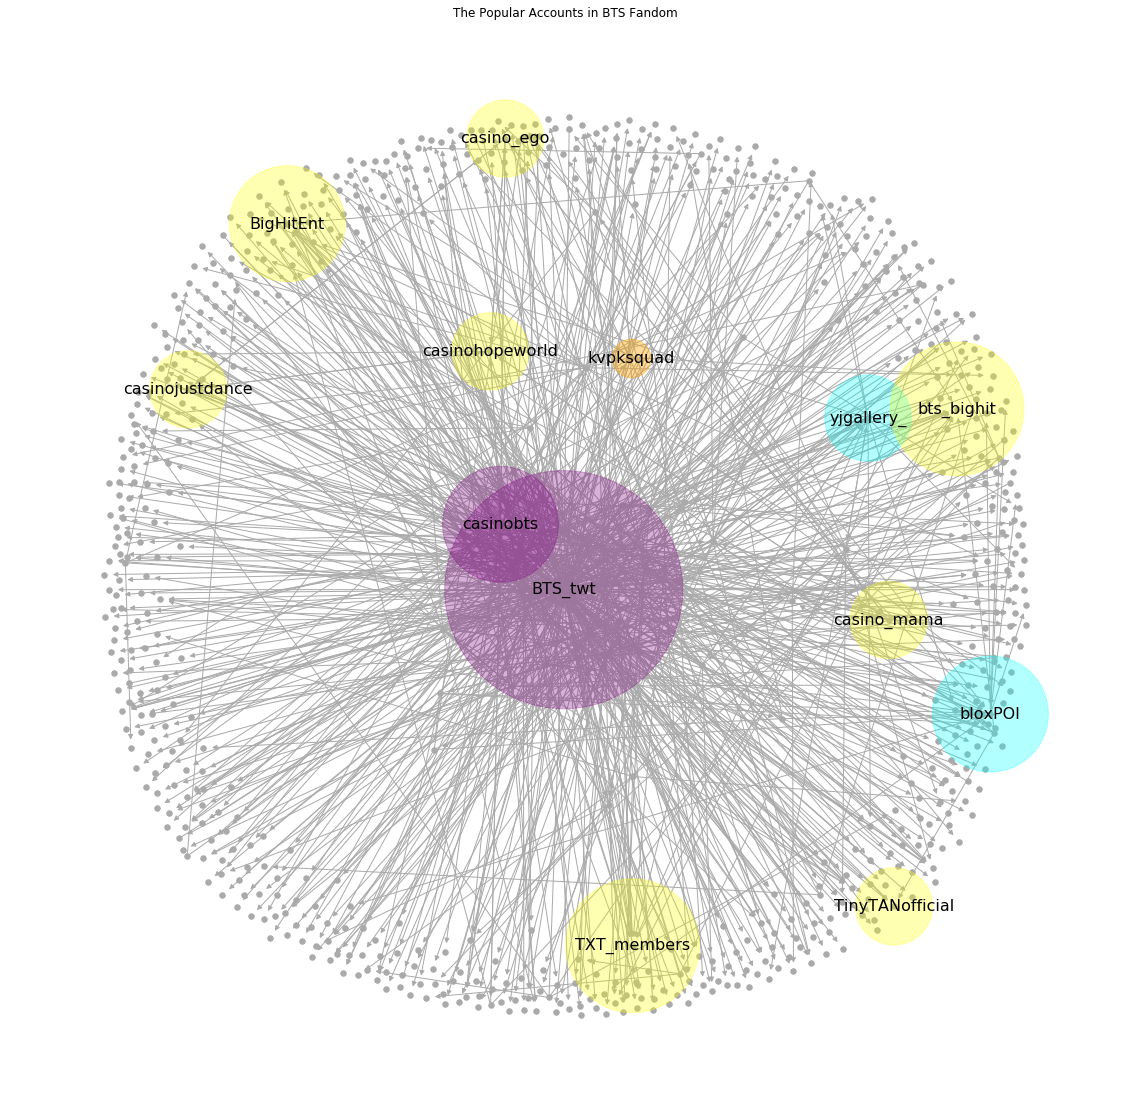

In [147]:
plt.figure(figsize =(20, 20))

layout = nx.spring_layout(graph,
                          k = 0.7)
nx.draw_networkx_edges(graph, 
                       layout, 
                       edge_color = '#AAAAAA')

uni_dots = [node for node in graph.nodes() 
            if node in np.unique(DF[['Users', 'Followers']].values)]
nx.draw_networkx_nodes(graph, 
                       layout, 
                       nodelist = uni_dots, 
                       node_size = 30, 
                       node_color = '#AAAAAA')

eig_dict = dict(filter(lambda value: value[1] > 0.03, 
                           dict(sorted(nx.eigenvector_centrality(graph).items(), 
                                       key=lambda item: item[1], 
                                       reverse=True)).items()))

inde_dict = dict(filter(lambda value: value[1] > 0.005, 
                           dict(sorted(nx.in_degree_centrality(graph).items(), 
                                       key=lambda item: item[1], 
                                       reverse=True)).items()))

btn_dict = dict(filter(lambda value: value[1] > 0.0005, 
                               dict(sorted(nx.betweenness_centrality(graph, 
                                                                     normalized = True, 
                                                                     endpoints = True).items(), 
                                           key=lambda item: item[1], 
                                           reverse=True)).items()))

intersection =  [node for node in graph.nodes() 
                 if node in eig_dict.keys()
                 if node in inde_dict.keys() 
                 if node in btn_dict.keys()]

size_intersection = [value * 1000000 for (node, value) in nx.in_degree_centrality(graph).items() 
                     if node in intersection]
nx.draw_networkx_nodes(graph, 
                       layout, 
                       nodelist = intersection, 
                       node_size = size_intersection, 
                       node_color = 'purple', 
                       alpha = 0.3)
nx.draw_networkx_labels(graph, 
                        layout, 
                        labels = dict(zip(list(intersection), list(intersection))),
                        font_size = 16)

inde_btn = [node for node in graph.nodes()
           if node not in eig_dict.keys()
           if node in inde_dict.keys()
           if node in btn_dict.keys()]
size_inde_btn = [value * 1000000 for (node, value) in nx.in_degree_centrality(graph).items() 
               if node in inde_btn]
nx.draw_networkx_nodes(graph, 
                       layout, 
                       nodelist = inde_btn, 
                       node_size = size_inde_btn, 
                       node_color = 'aqua', 
                       alpha = 0.3)
nx.draw_networkx_labels(graph, 
                        layout, 
                        labels = dict(zip(list(inde_btn), list(inde_btn))),
                        font_size = 16)

eig_inde = [node for node in graph.nodes()
           if node in eig_dict.keys()
           if node in inde_dict.keys()
           if node not in btn_dict.keys()]
size_eig_inde = [value * 1000000 for (node, value) in nx.in_degree_centrality(graph).items() 
               if node in eig_inde]
nx.draw_networkx_nodes(graph, 
                       layout, 
                       nodelist = eig_inde, 
                       node_size = size_eig_inde, 
                       node_color = 'yellow', 
                       alpha = 0.3)
nx.draw_networkx_labels(graph, 
                        layout, 
                        labels = dict(zip(list(eig_inde), list(eig_inde))),
                        font_size = 16)

eig_btn = [node for node in graph.nodes()
           if node in eig_dict.keys()
           if node not in inde_dict.keys()
           if node in btn_dict.keys()]
size_eig_btn = [value * 1000000 for (node, value) in nx.in_degree_centrality(graph).items() 
               if node in eig_btn]
nx.draw_networkx_nodes(graph, 
                       layout, 
                       nodelist = eig_btn, 
                       node_size = size_eig_btn, 
                       node_color = 'orange', 
                       alpha = 0.4)
nx.draw_networkx_labels(graph, 
                        layout, 
                        labels = dict(zip(list(eig_btn), list(eig_btn))),
                        font_size = 16)

plt.axis('off')
plt.title("The Popular Accounts in BTS Fandom")
#based on eigenvector_centrality, in-degree centrality & betweenness centrality
plt.show()